In [1]:
import pandas as pd
df = pd.read_csv("archive/IMDbMovies.csv", index_col = 0)
#corrigir as linhas que possuem valores vazios
tabela = df.dropna()
tabela

,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend Gross in US & Canada
Title,,,,,,,,,,,,,
The Hunger Games: The Ballad of Songbirds & Snakes,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
Oppenheimer,"The story of American scientist, J. Robert Opp...",Christopher Nolan,"Martin Sherwin,Christopher Nolan,Kai Bird","Biography,Drama,History",R,3h,2023.0,8.5/10,525K,"$100,000,000 (estimated)","$325,367,020","$950,554,020","$82,455,420Jul 23, 2023"
The Marvels,Carol Danvers gets her powers entangled with t...,Nia DaCosta,"Elissa Karasik,Nia DaCosta,Megan McDonnell","Action,Adventure,Fantasy",PG-13,1h 45m,2023.0,6.0/10,57K,"$220,000,000 (estimated)","$77,926,655","$188,196,816","$46,110,859Nov 12, 2023"
Wish,A young girl named Asha wishes on a star and g...,"Fawn Veerasunthorn,Chris Buck","Jennifer Lee,Chris Buck,Allison Moore","Animation,Adventure,Comedy",PG,1h 35m,2023.0,5.9/10,6.4K,"$200,000,000 (estimated)","$33,974,306","$51,276,049","$19,698,228Nov 26, 2023"
The Creator,Against the backdrop of a war between humans a...,Gareth Edwards,"Chris Weitz,Gareth Edwards","Action,Adventure,Drama",PG-13,2h 13m,2023.0,6.9/10,79K,"$80,000,000 (estimated)","$40,774,679","$104,181,028","$14,079,512Oct 1, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bratz,"During their first year of high school, four b...",Sean McNamara,"Susan Estelle Jansen,David Eilenberg,Adam De L...","Comedy,Family,Music",PG,1h 50m,2007.0,3.1/10,25K,"$20,000,000 (estimated)","$10,010,209","$26,013,153","$4,208,455Aug 5, 2007"
Carandiru,It tells some of the stories that occurred in ...,Hector Babenco,"Hector Babenco,Fernando Bonassi,Victor Navas","Crime,Drama",R,2h 25m,2003.0,7.6/10,21K,"R$12,000,000 (estimated)","$216,335","$10,781,635","$17,945May 16, 2004"
Don Juan DeMarco,A psychiatrist must cure a young patient who p...,Jeremy Leven,"Jeremy Leven,Lord Byron,Lord Byron(in part)","Comedy,Drama,Romance",PG-13,1h 37m,1994.0,6.7/10,53K,"$25,000,000 (estimated)","$22,150,451","$68,792,531","$4,556,274Apr 9, 1995"


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_4157/3606015665.py:7: SyntaxWarning: invalid escape sequence '\$'
  filmesSeculo21['Gross worldwide'] = filmesSeculo21['Gross worldwide'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_4157/3606015665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmesSeculo21['Gross worldwide'] = filmesSeculo21['Gross worldwide'].replace('[\$,]', '', regex=True).astype(float)


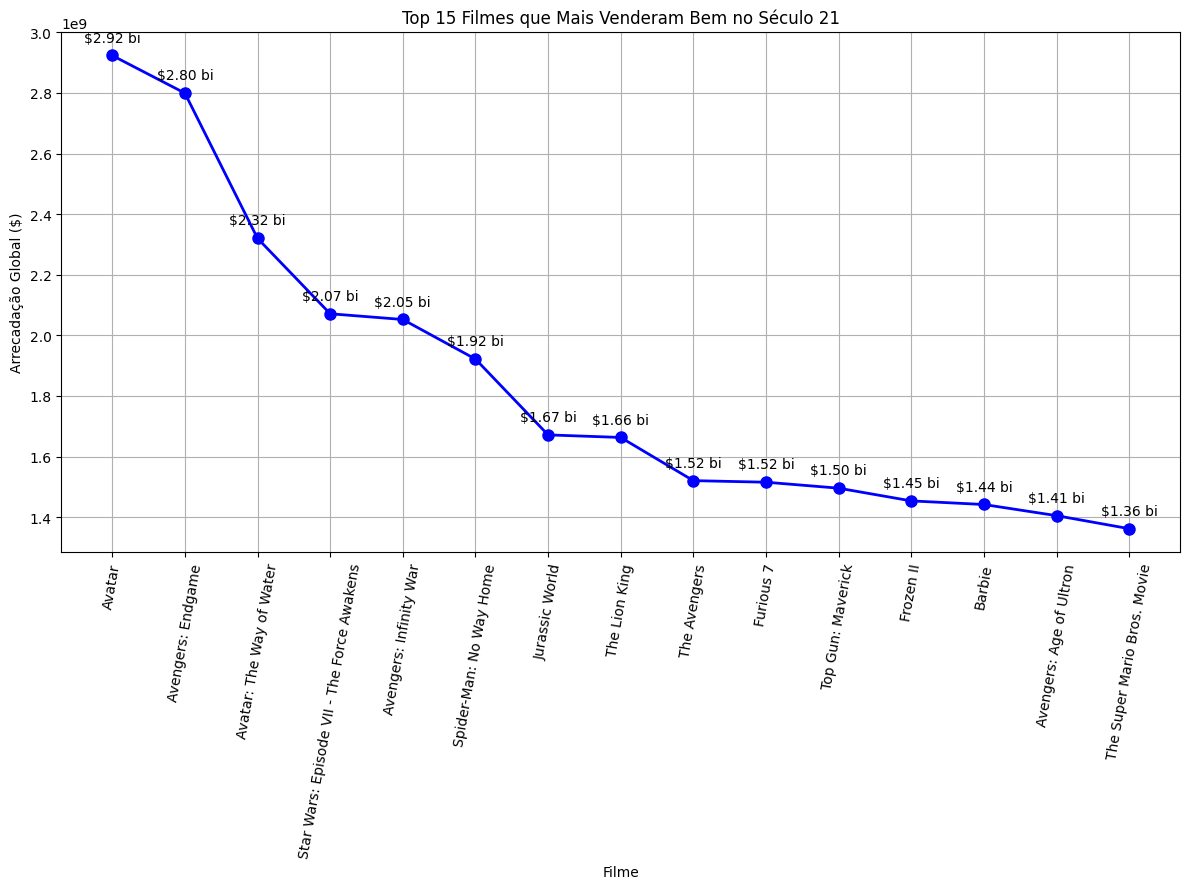

In [2]:
#OS QUE MAIS VENDERAM
import matplotlib.pyplot as plt
# Selecionando apenas filmes do século 21
filmesSeculo21 = tabela[tabela['Release Year'] >= 2001]

# Limpando e convertendo 'Gross worldwide' para float
filmesSeculo21['Gross worldwide'] = filmesSeculo21['Gross worldwide'].replace('[\$,]', '', regex=True).astype(float)

# Ordenando os filmes por 'Gross worldwide' em ordem decrescente
venderamBem = filmesSeculo21.sort_values(by=['Gross worldwide'], ascending=False)

# Filtrando os top 20 filmes que mais venderam bem
top_filmes_vendidos = venderamBem.head(15)

# Preparando dados para o gráfico
nomes_filmes = top_filmes_vendidos.index.tolist()
vendas = top_filmes_vendidos['Gross worldwide'].tolist()

# Criando o gráfico de linhas
plt.figure(figsize=(12, 9))
plt.plot(nomes_filmes, vendas, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Filme')
plt.ylabel('Arrecadação Global ($)')
plt.title('Top 15 Filmes que Mais Venderam Bem no Século 21')
plt.xticks(rotation=80)
plt.grid(True)
plt.tight_layout()

# Adicionando valores aos pontos do gráfico
for i, valor in enumerate(vendas):
    plt.annotate('${:,.2f} bi'.format(valor / 1e9), (nomes_filmes[i], valor), textcoords="offset points", xytext=(0,10), ha='center')

# Exibindo o gráfico
plt.show()


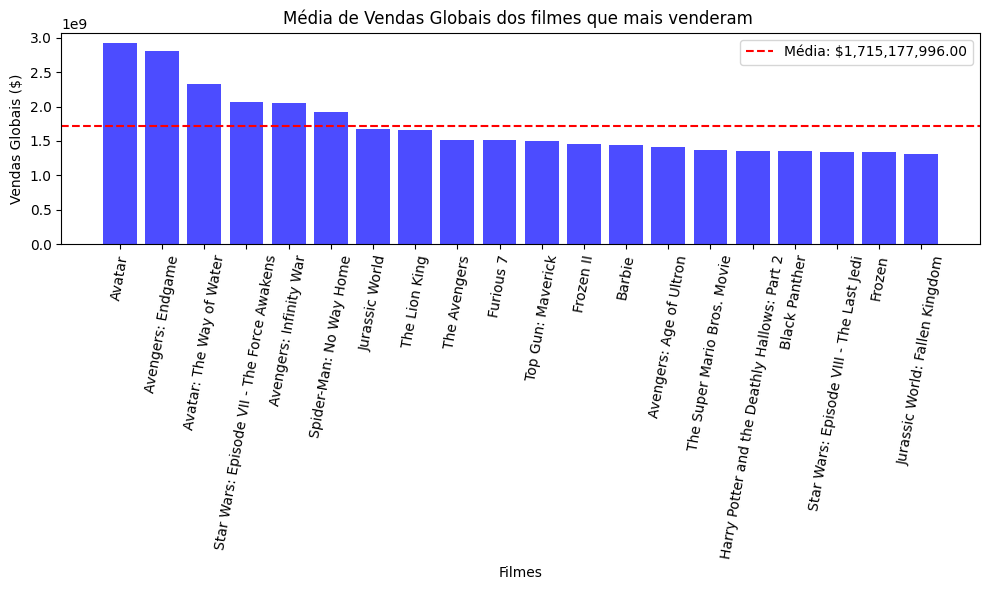

In [3]:
#MEDIA DOS QUE MAIS VENDERAM
# Joguei em um array o resultado obtido na analise
filmes_mais_venderam_bem = {
    'Avatar': 2923706026,
    'Avengers: Endgame': 2799439100,
    'Avatar: The Way of Water': 2320250281,
    'Star Wars: Episode VII - The Force Awakens': 2071310218,
    'Avengers: Infinity War': 2052415039,
    'Spider-Man: No Way Home': 1921847111,
    'Jurassic World': 1671537444,
    'The Lion King': 1663075401,
    'The Avengers': 1520538536,
    'Furious 7': 1515341399,
    'Top Gun: Maverick': 1495696292,
    'Frozen II': 1453683476,
    'Barbie': 1441791846,
    'Avengers: Age of Ultron': 1405018048,
    'The Super Mario Bros. Movie': 1361976691,
    'Harry Potter and the Deathly Hallows: Part 2': 1356841356,
    'Black Panther': 1349926083,
    'Star Wars: Episode VIII - The Last Jedi': 1334407706,
    'Frozen': 1334291571,
    'Jurassic World: Fallen Kingdom': 1310466296
}

# Calcular a média dos valores de vendas globais
media_vendas = sum(filmes_mais_venderam_bem.values()) / len(filmes_mais_venderam_bem)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(filmes_mais_venderam_bem.keys(), filmes_mais_venderam_bem.values(), color='blue', alpha=0.7)
plt.axhline(y=media_vendas, color='red', linestyle='--', label=f'Média: ${media_vendas:,.2f}')
plt.xticks(rotation=80)
plt.xlabel('Filmes')
plt.ylabel('Vendas Globais ($)')
plt.title('Média de Vendas Globais dos filmes que mais venderam ')
plt.legend()
plt.tight_layout()
plt.show()

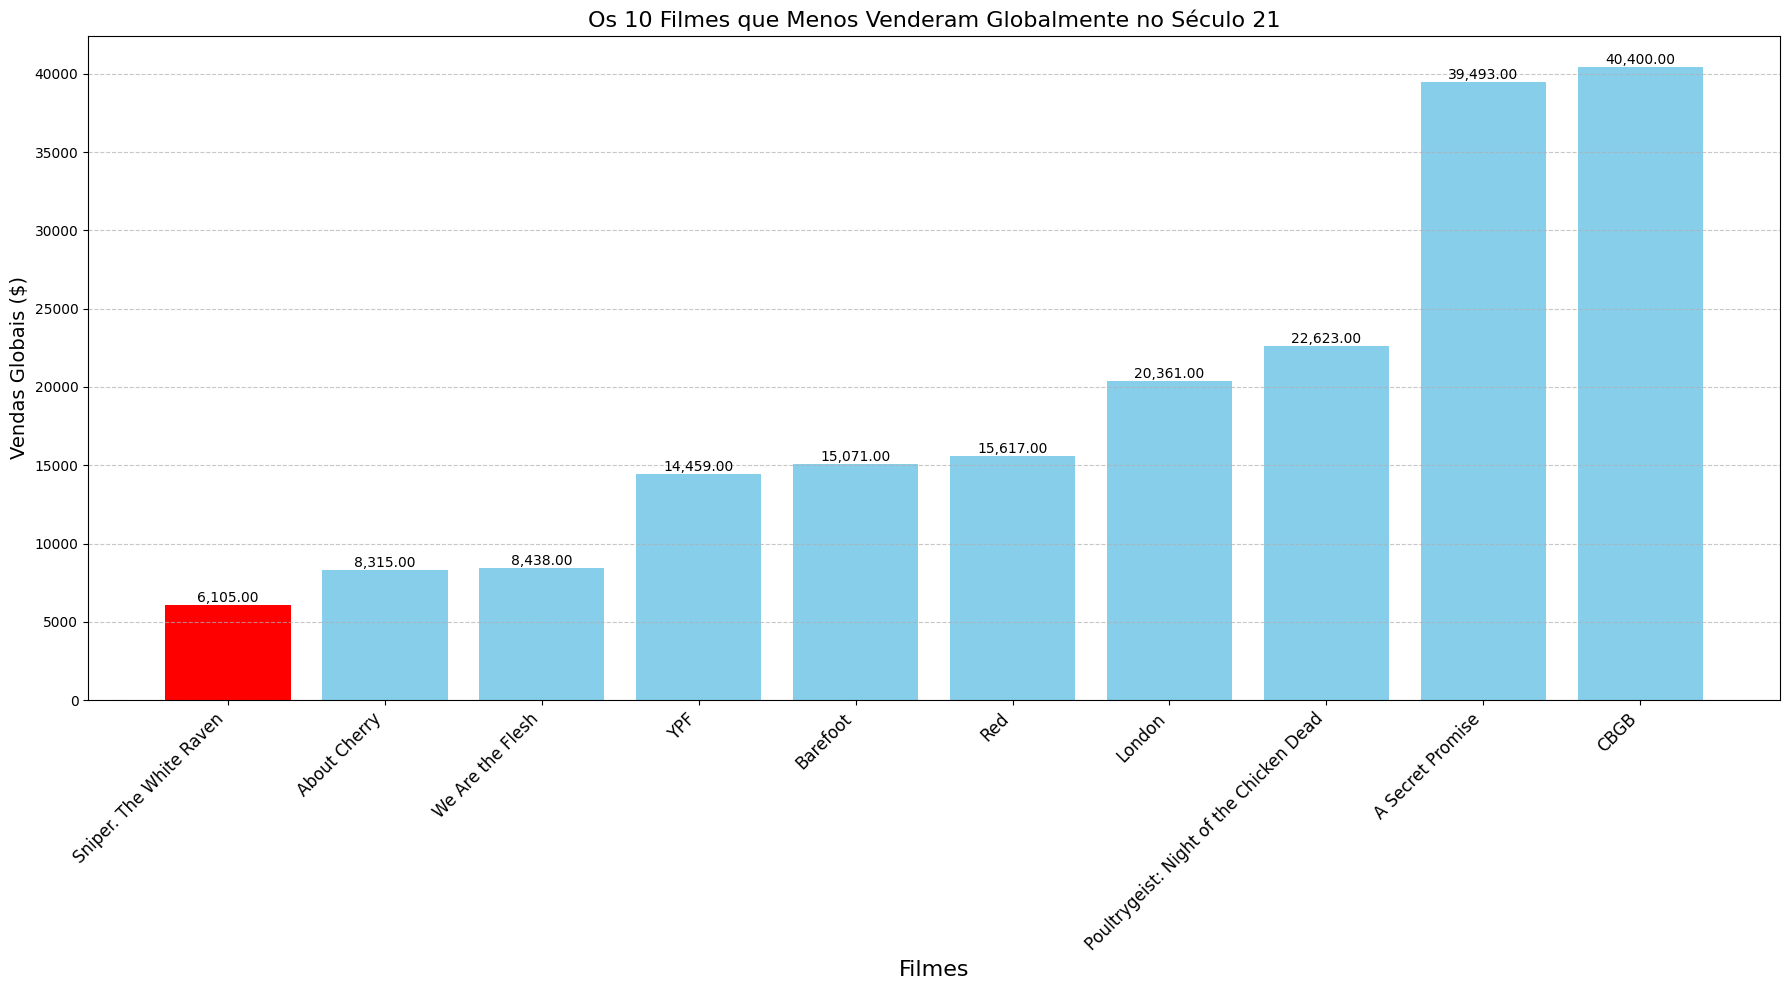

In [4]:
#QUE MENOS VENDERAM

# Ordenar os dados dos 10 filmes que menos venderam globalmente
venderamMenos = filmesSeculo21.sort_values(['Gross worldwide'], ascending=True).head(10)

# Preparar os dados para o gráfico de barras
nomes_filmes = venderamMenos.index.tolist()
valores_vendas = venderamMenos['Gross worldwide'].tolist()

# Definir as cores das barras
cores_barras = ['red' if valor == min(valores_vendas) else 'skyblue' for valor in valores_vendas]

# Plotar o gráfico de barras
plt.figure(figsize=(18, 10))
bars = plt.bar(nomes_filmes, valores_vendas, color=cores_barras)

# Adicionar valores numéricos nas barras
for bar, value in zip(bars, valores_vendas):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:,.2f}', ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.xlabel('Filmes', fontsize=16)
plt.ylabel('Vendas Globais ($)', fontsize=14)
plt.title('Os 10 Filmes que Menos Venderam Globalmente no Século 21', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_4157/2116226502.py:3: SyntaxWarning: invalid escape sequence '\$'
  filmesSeculo21['Budget'] = filmesSeculo21['Budget'].replace('[\$,]', '', regex=True)
/tmp/ipykernel_4157/2116226502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmesSeculo21['Budget'] = filmesSeculo21['Budget'].replace('[\$,]', '', regex=True)
/tmp/ipykernel_4157/2116226502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

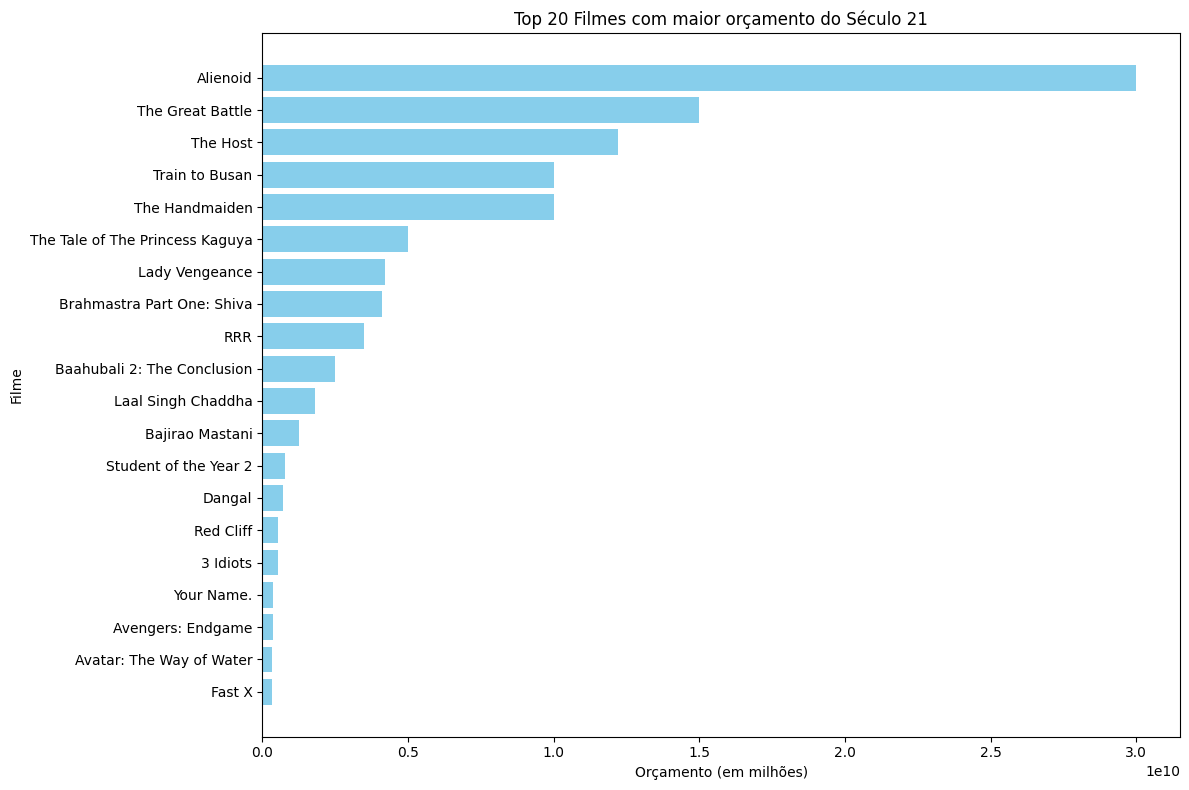

In [5]:
#MAIOR ORÇAMENTO
# Remover caracteres não numéricos do orçamento
filmesSeculo21['Budget'] = filmesSeculo21['Budget'].replace('[\$,]', '', regex=True)

# Confirmar que a coluna Budget é tratada como string
filmesSeculo21['Budget'] = filmesSeculo21['Budget'].astype(str)

# Extrair apenas os números (incluindo decimais) da string
filmesSeculo21['Budget'] = filmesSeculo21['Budget'].str.extract(r'(\d+\.?\d*)').astype(float)

# Ordenar os filmes pelo orçamento de forma decrescente e selecionar os top 20
top_filmes_caros = filmesSeculo21.sort_values(by='Budget', ascending=False).head(20)

# Preparar os dados para o gráfico
nomes_filmes = top_filmes_caros.index.tolist()
orcamentos = top_filmes_caros['Budget'].tolist()

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(nomes_filmes, orcamentos, color='skyblue')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Filme')
plt.title('Top 20 Filmes com maior orçamento do Século 21')
plt.gca().invert_yaxis()  # Inverter a ordem para o filme mais caro aparecer primeiro
plt.tight_layout()

# Exibir o gráfico
plt.show()


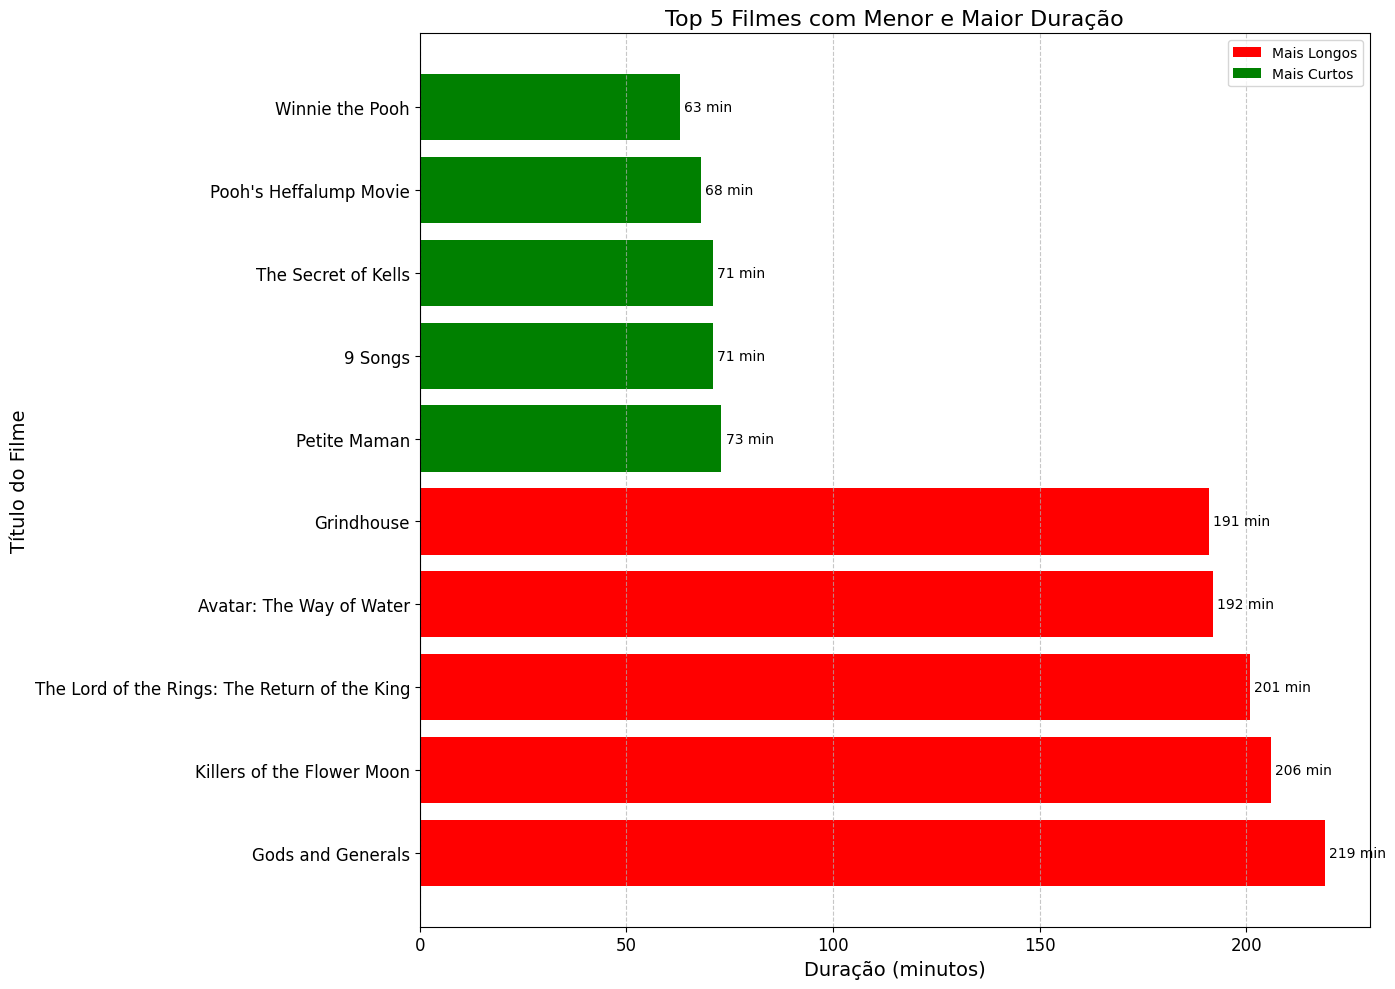

In [6]:
#MAIOR E A MENOR DURAÇÃO

# Dados dos filmes com durações
dados = {
    'Title': [
        'Gods and Generals', 'Killers of the Flower Moon', 'The Lord of the Rings: The Return of the King',
        'Avatar: The Way of Water', 'Grindhouse', 'Petite Maman', '9 Songs', 'The Secret of Kells',
        "Pooh's Heffalump Movie", 'Winnie the Pooh'
    ],
    'Runtime': ['3h 39m', '3h 26m', '3h 21m', '3h 12m', '3h 11m', '1h 13m', '1h 11m', '1h 11m', '1h 8m', '1h 3m']
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Função para converter 'Runtime' para minutos
def convert_to_minutes(runtime):
    parts = runtime.split()
    hours = int(parts[0][:-1]) * 60  # Remove o 'h' e converte para minutos
    minutes = int(parts[1][:-1]) if len(parts) > 1 else 0  # Remove o 'm' e converte para minutos
    return hours + minutes

# Aplicando a função de conversão
df['Runtime (minutes)'] = df['Runtime'].apply(convert_to_minutes)

# Ordenando os filmes pelo tempo de execução
df_sorted = df.sort_values(by='Runtime (minutes)', ascending=False)

# Selecionando os 5 filmes mais longos e os 5 filmes mais curtos
longest_movies = df_sorted.head(5)
shortest_movies = df_sorted.tail(5)

# Criando uma nova tabela para combinar os dados
combined_movies = pd.concat([longest_movies, shortest_movies])

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(14, 10))

# Plotando os filmes mais longos
bars_longest = plt.barh(longest_movies['Title'], longest_movies['Runtime (minutes)'], color='red', label='Mais Longos')

# Plotando os filmes mais curtos
bars_shortest = plt.barh(shortest_movies['Title'], shortest_movies['Runtime (minutes)'], color='green', label='Mais Curtos')

# Adicionar valores numéricos nas barras
for bar in bars_longest:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} min', ha='left', va='center', fontsize=10)

for bar in bars_shortest:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} min', ha='left', va='center', fontsize=10)

# Configurações do gráfico
plt.xlabel('Duração (minutos)', fontsize=14)
plt.ylabel('Título do Filme', fontsize=14)
plt.title('Top 5 Filmes com Menor e Maior Duração', fontsize=16)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


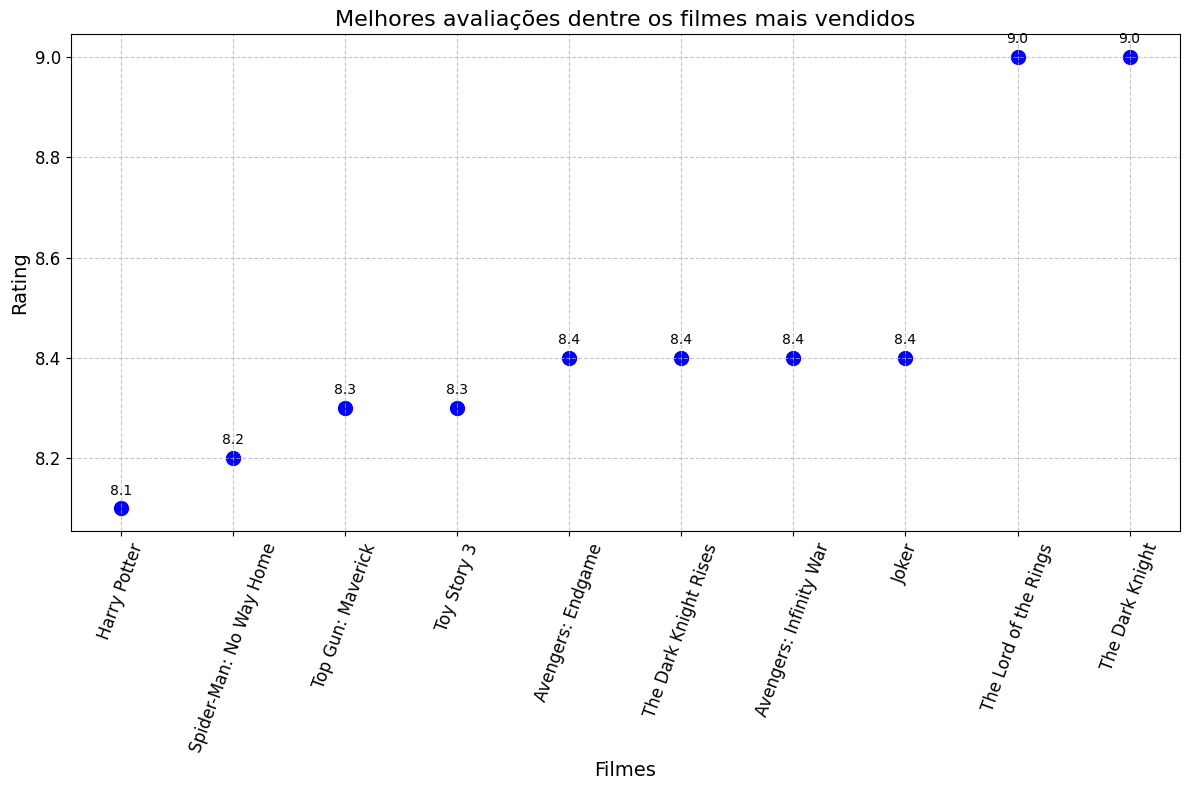

In [7]:
#MELHORES AVALIAÇÕES DENTRE OS FILMES MAIS CAROS

# Dados dos filmes com melhores avaliações
data = {
    'Title': [
        'The Dark Knight', 'The Lord of the Rings',
        'Joker', 'Avengers: Infinity War', 'The Dark Knight Rises',
        'Avengers: Endgame', 'Top Gun: Maverick', 'Toy Story 3',
        'Spider-Man: No Way Home', 'Harry Potter'
    ],
    'Rating': [
        9.0, 9.0, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.2, 8.1
    ]
}

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Ordenando os filmes por rating (do menor para o maior)
df_sorted = df.sort_values(by='Rating')

# Plotando o gráfico de pontos flutuantes
plt.figure(figsize=(12, 8))
plt.scatter(df_sorted['Title'], df_sorted['Rating'], color='blue', s=100)

# Adicionando rótulos de dados para cada ponto
for i, txt in enumerate(df_sorted['Rating']):
    plt.annotate(f'{txt}', (df_sorted['Title'].iloc[i], df_sorted['Rating'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Configurando o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Melhores avaliações dentre os filmes mais vendidos', fontsize=16)
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()



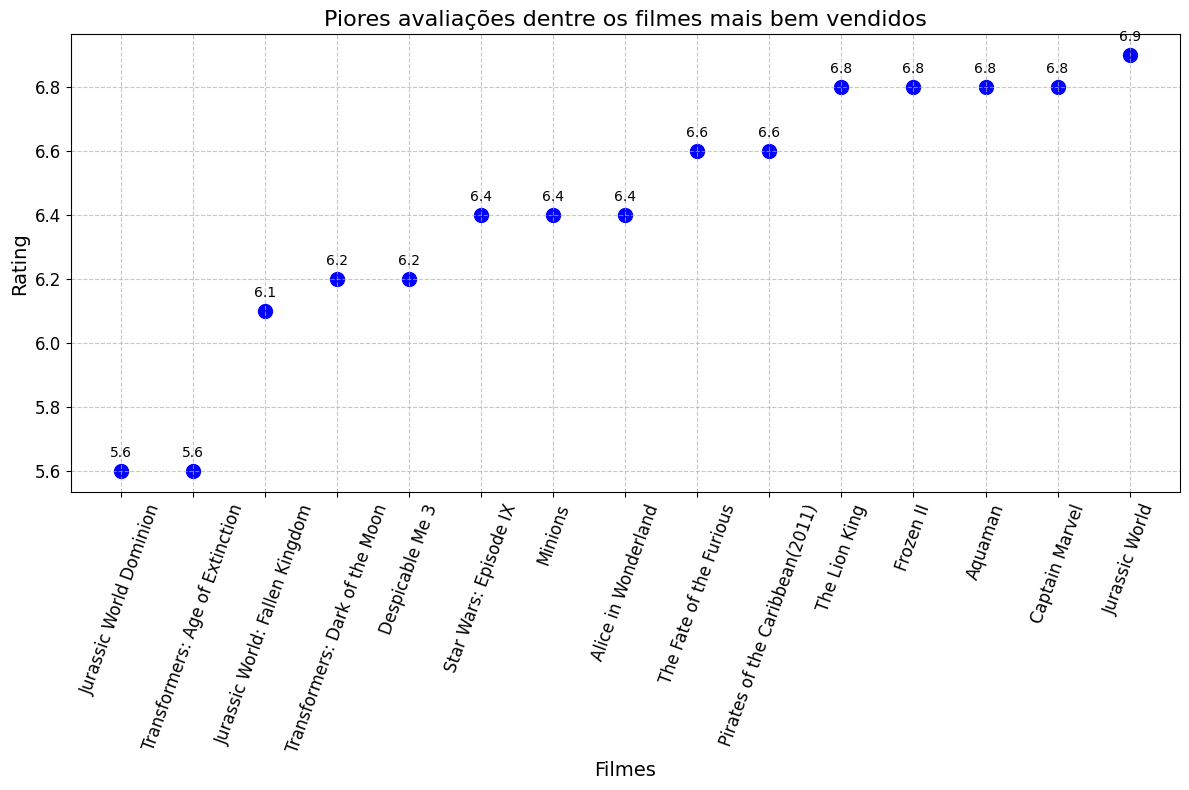

In [8]:
#PIORES AVALIAÇÕES DENTRE OS MAIS BEM VENDIDOS

# Dados dos filmes com piores avaliações
data = {
    'Title': [
        'Jurassic World Dominion', 'Transformers: Age of Extinction',
        'Jurassic World: Fallen Kingdom', 'Transformers: Dark of the Moon',
        'Despicable Me 3', 'Star Wars: Episode IX',
        'Minions', 'Alice in Wonderland', 'The Fate of the Furious',
        'Pirates of the Caribbean(2011)', 'The Lion King',
        'Frozen II', 'Aquaman', 'Captain Marvel', 'Jurassic World',
        'Star Wars: Episode VIII - The Last Jedi', 'Aladdin', 'Barbie',
        'The Super Mario Bros. Movie', 'Iron Man 3', 'Beauty and the Beast',
        'Furious 7', 'Finding Dory'
    ],
    'Rating': [
        5.6, 5.6, 6.1, 6.2, 6.2, 6.4, 6.4, 6.4, 6.6, 6.6, 6.8, 6.8, 6.8,
        6.8, 6.9, 6.9, 6.9, 7.0, 7.1, 7.1, 7.1, 7.1, 7.2
    ]
}

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Ordenando os filmes por rating (do menor para o maior)
df_sorted = df.sort_values(by='Rating').head(15)

# Plotando o gráfico de pontos flutuantes
plt.figure(figsize=(12, 8))
plt.scatter(df_sorted['Title'], df_sorted['Rating'], color='blue', s=100)

# Adicionando rótulos de dados para cada ponto
for i, txt in enumerate(df_sorted['Rating']):
    plt.annotate(f'{txt}', (df_sorted['Title'].iloc[i], df_sorted['Rating'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Configurando o gráfico
plt.xlabel('Filmes', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Piores avaliações dentre os filmes mais bem vendidos', fontsize=16)
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


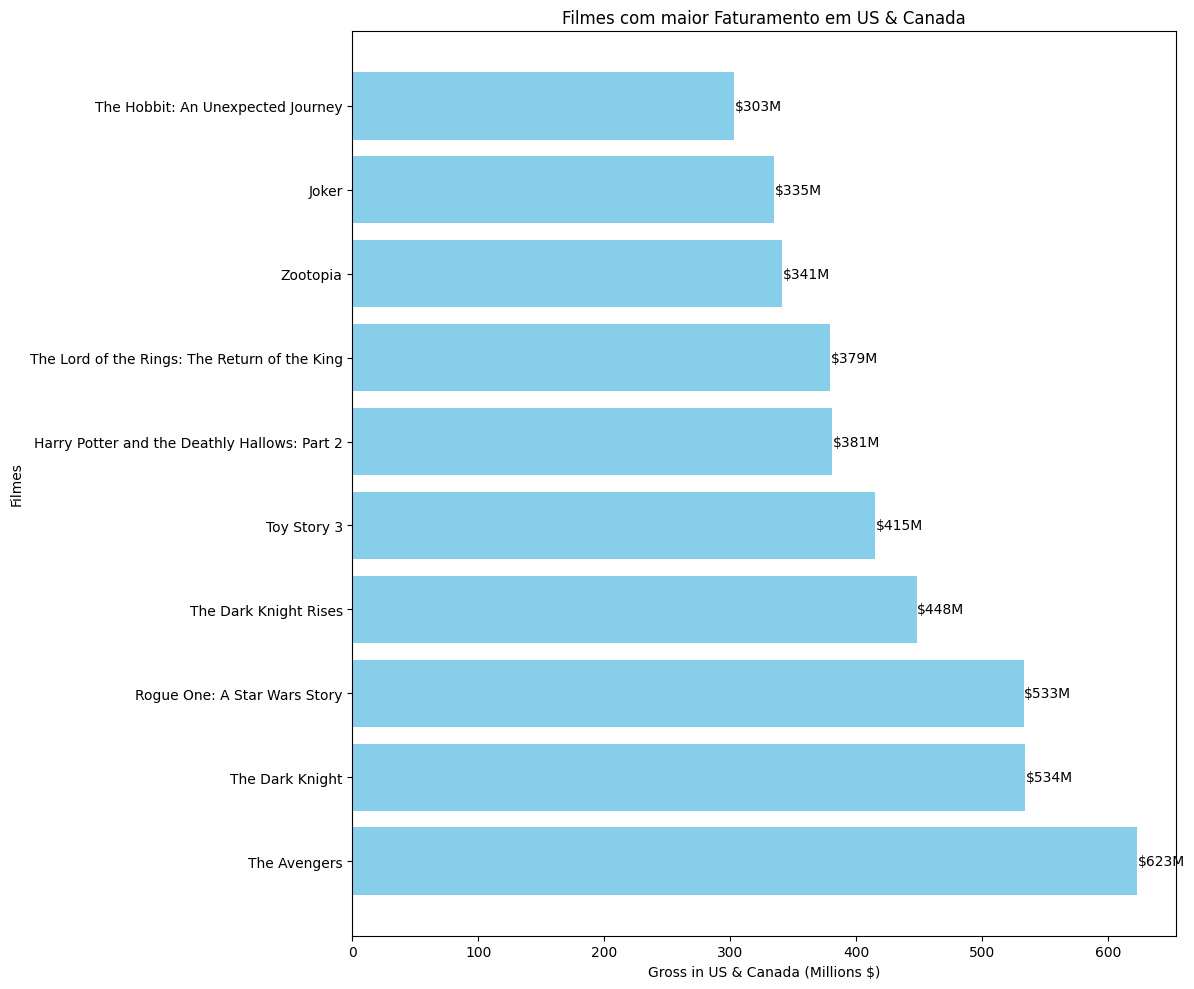

In [9]:
# Dados dos filmes mais caros vendidos nos EUA e Canadá

# Dados dos filmes com faturamento em US & Canada
data = {
    'Title': [
        'The Dark Knight', 'The Lord of the Rings: The Return of the King',
        'Joker', 'Avengers: Infinity War', 'The Dark Knight Rises',
        'Avengers: Endgame', 'Top Gun: Maverick', 'Toy Story 3',
        'Spider-Man: No Way Home', 'Harry Potter and the Deathly Hallows: Part 2',
        'Zootopia', 'The Avengers', 'Avatar', 'Rogue One: A Star Wars Story',
        'The Hobbit: An Unexpected Journey'
    ],
    'Gross in US & Canada': [
        534987076, 379427292, 335477657, 678815482, 448149584,
        858373000, 718732821, 415004880, 814115070, 381447587,
        341268248, 623357910, 785221649, 533539991, 303030651
    ]
}

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Ordenando os filmes pelo faturamento em US & Canada (do maior para o menor)
df_sorted = df.sort_values(by='Gross in US & Canada', ascending=True).head(10)

# Abreviando os valores do faturamento para exibir apenas uma parte
df_sorted['Gross in US & Canada'] = df_sorted['Gross in US & Canada'] / 1_000_000  # Convertendo para milhões
df_sorted['Gross in US & Canada'] = df_sorted['Gross in US & Canada'].astype(int)  # Convertendo para inteiros

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(12, 10))
bars = plt.barh(df_sorted['Title'], df_sorted['Gross in US & Canada'], color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Gross in US & Canada (Millions $)')
plt.ylabel('Filmes')
plt.title('Filmes com maior Faturamento em US & Canada')

# Adicionando os valores numéricos nas barras
for bar, value in zip(bars, df_sorted['Gross in US & Canada']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'${value}M', 
             ha='left', va='center', fontsize=10)

# Exibindo o gráfico
plt.gca().invert_yaxis()  # Invertendo a ordem dos filmes para começar do maior faturamento
plt.tight_layout()
plt.show()


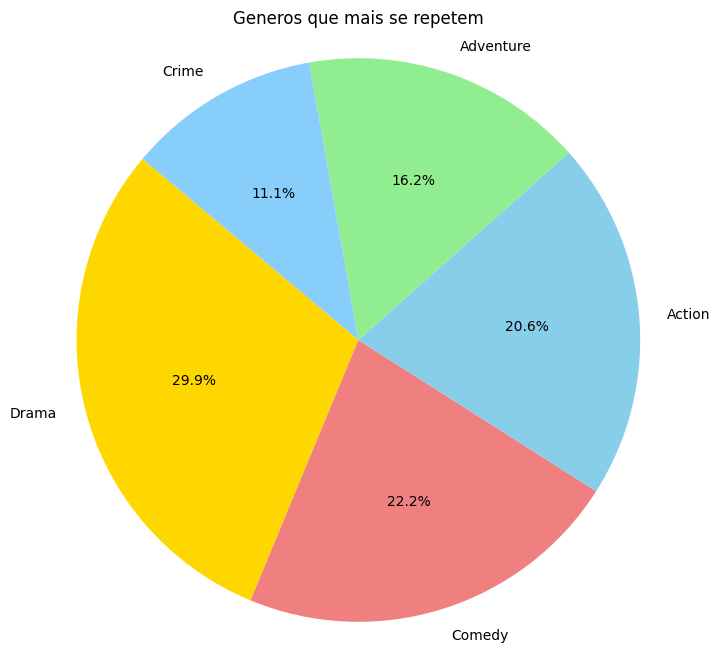

In [10]:
#GENEROS QUE MAIS SE REPETEM

# Dados dos gêneros de filmes e suas contagens
generos = ['Drama', 'Comedy', 'Action', 'Adventure', 'Crime']
contagens = [1359, 1012, 937, 738, 505]

# Configuração do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagens, labels=generos, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue', 'lightgreen', 'lightskyblue'])

# Configuração do título
plt.title('Generos que mais se repetem')

# Exibindo o gráfico
plt.axis('equal')  # Mantém o aspecto da imagem igual para que o gráfico seja circular
plt.show()


In [7]:
import pandas as pd
df = pd.read_csv("archive/IMDbMovies.csv", index_col = 0)
tabela = df.dropna()
filmesSeculo21 = tabela[tabela['Release Year'] >= 2001]

director_counts = filmesSeculo21['Director'].value_counts().head(15)
director_counts

Director
Steven Spielberg      16
Ridley Scott          16
Clint Eastwood        13
Antoine Fuqua         11
Steven Soderbergh     11
Michael Bay           11
Shawn Levy            11
Guy Ritchie           11
Tim Burton            10
M. Night Shyamalan    10
Marc Forster          10
James Wan             10
Christopher Nolan     10
James Mangold          9
Woody Allen            9
Name: count, dtype: int64

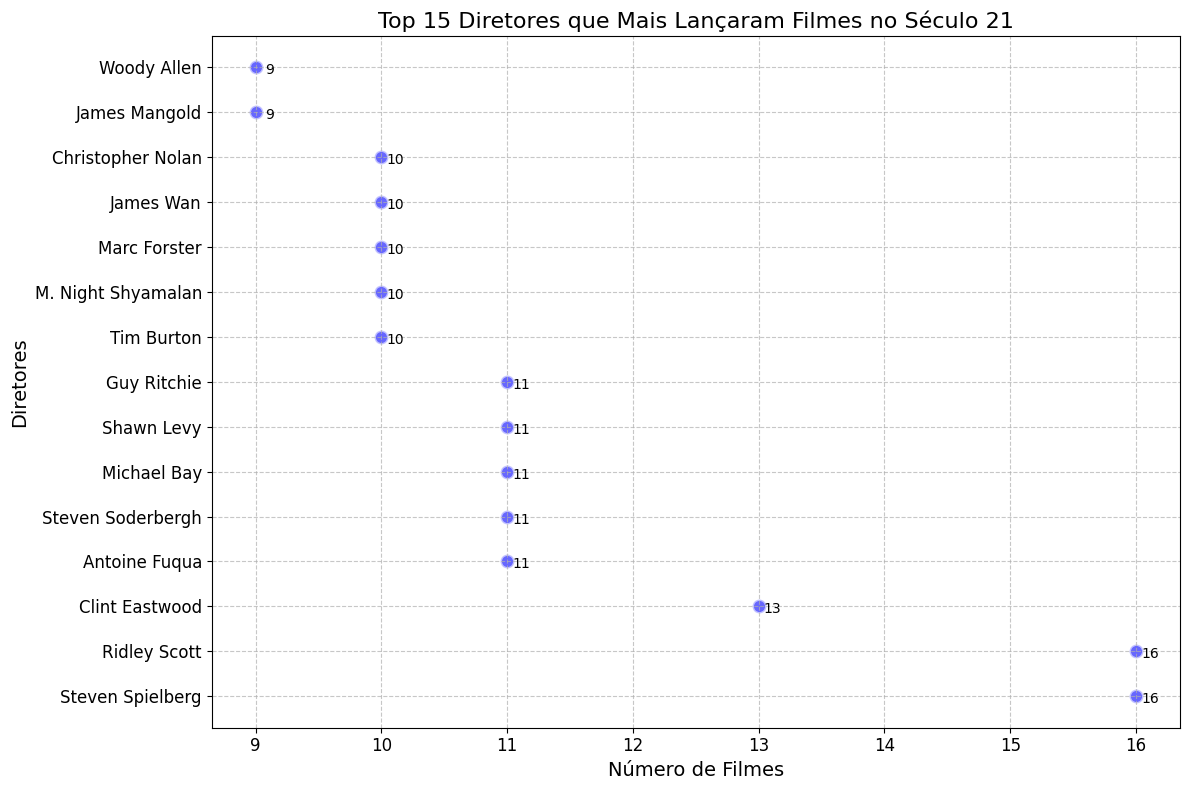

In [11]:
#DIRETORES QUE MAIS LANÇARAM FILMES
import matplotlib.pyplot as plt

# Supondo que o dataframe 'filmesSeculo21' já esteja definido e carregado com os dados dos filmes
# Contar a frequência dos diretores
director_counts = filmesSeculo21['Director'].value_counts().head(15)

# Preparar os dados para o gráfico
directors = director_counts.index.tolist()
movie_counts = director_counts.values.tolist()

# Criando um DataFrame para o gráfico de dispersão
df_directors = pd.DataFrame({
    'Director': directors,
    'Movies': movie_counts
})

# Plotando o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(df_directors['Movies'], df_directors['Director'], color='blue', s=100, alpha=0.6, edgecolors='w', linewidth=2)

# Adicionando rótulos de dados para cada ponto
for i, txt in enumerate(df_directors['Movies']):
    plt.annotate(f'{txt}', (df_directors['Movies'][i], df_directors['Director'][i]), 
                 textcoords="offset points", xytext=(10,-5), ha='center')

# Configurações do gráfico
plt.xlabel('Número de Filmes', fontsize=14)
plt.ylabel('Diretores', fontsize=14)
plt.title('Top 15 Diretores que Mais Lançaram Filmes no Século 21', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
